# LINEAR REGRESSION --  CAR  ASSIGNMENT

Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings


from sklearn.preprocessing import LabelEncoder


from sklearn import preprocessing

from sklearn.model_selection import train_test_split


from sklearn.preprocessing import MinMaxScaler


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


import statsmodels.api as sm


from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
def plotHeatMap(data):
    plt.figure(figsize = (20, 26))
    plt.subplot(2, 1, 1)
    sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
    plt.show()

In [4]:
cars_df = pd.read_csv("S:/ds/Linear Regression/CarPrice_Assignment.csv")
cars_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8000,177.3000,66.3000,53.1000,2507,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,15250.0000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8000,192.7000,71.4000,55.7000,2844,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,17710.0000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8000,192.7000,71.4000,55.7000,2954,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,18920.0000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8000,192.7000,71.4000,55.9000,3086,ohc,five,131,mpfi,3.1300,3.4000,8.3000,140,5500,17,20,23875.0000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5000,178.2000,67.9000,52.0000,3053,ohc,five,131,mpfi,3.1300,3.4000,7.0000,160,5500,16,22,17859.1670


In [5]:
cars_df['CompanyName'] = cars_df['CarName'].str.split().str[0]

cars_df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,audi
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8000,177.3000,66.3000,53.1000,2507,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,15250.0000,audi
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8000,192.7000,71.4000,55.7000,2844,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,17710.0000,audi
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8000,192.7000,71.4000,55.7000,2954,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,18920.0000,audi
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8000,192.7000,71.4000,55.9000,3086,ohc,five,131,mpfi,3.1300,3.4000,8.3000,140,5500,17,20,23875.0000,audi
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5000,178.2000,67.9000,52.0000,3053,ohc,five,131,mpfi,3.1300,3.4000,7.0000,160,5500,16,22,17859.1670,audi


In [6]:
cols = cars_df.columns.tolist()
cols = cols[-1:] + cols[:-1]

# Assigning the re-arranged columns to our 'cars_df'
cars_df = cars_df[cols]
cars_df

,CompanyName,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,alfa-romero,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,alfa-romero,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,audi,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,audi,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000
5,audi,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8000,177.3000,66.3000,53.1000,2507,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,15250.0000
6,audi,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8000,192.7000,71.4000,55.7000,2844,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,17710.0000
7,audi,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8000,192.7000,71.4000,55.7000,2954,ohc,five,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,18920.0000
8,audi,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8000,192.7000,71.4000,55.9000,3086,ohc,five,131,mpfi,3.1300,3.4000,8.3000,140,5500,17,20,23875.0000
9,audi,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5000,178.2000,67.9000,52.0000,3053,ohc,five,131,mpfi,3.1300,3.4000,7.0000,160,5500,16,22,17859.1670


In [7]:
cars_df.drop('CarName', axis = 1, inplace = True)

# Lets look at the data again
cars_df.head()

,CompanyName,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,1,3,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,alfa-romero,2,3,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,alfa-romero,3,1,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,audi,4,2,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,audi,5,2,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [8]:
cars_df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['alfa-romero'], 'alfa-romeo')
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['maxda', 'Mazda'], 'mazda')
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['Nissan'], 'nissan')
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['porcshce'], 'porsche')
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['toyouta'], 'toyota')
cars_df['CompanyName'] = cars_df['CompanyName'].replace(['volkswagen', 'vokswagen', 'vw'], 'volkswagen')

#Now lets look into the unique values in 'Comapny Name' again-
cars_df['CompanyName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,103.0000,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,59.3226,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,1.0000,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,52.0000,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,103.0000,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,154.0000,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,205.0000,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


Data Visualization

In [11]:
cars_df.price.describe()

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
25%      7788.0000
50%     10295.0000
75%     16503.0000
max     45400.0000
Name: price, dtype: float64

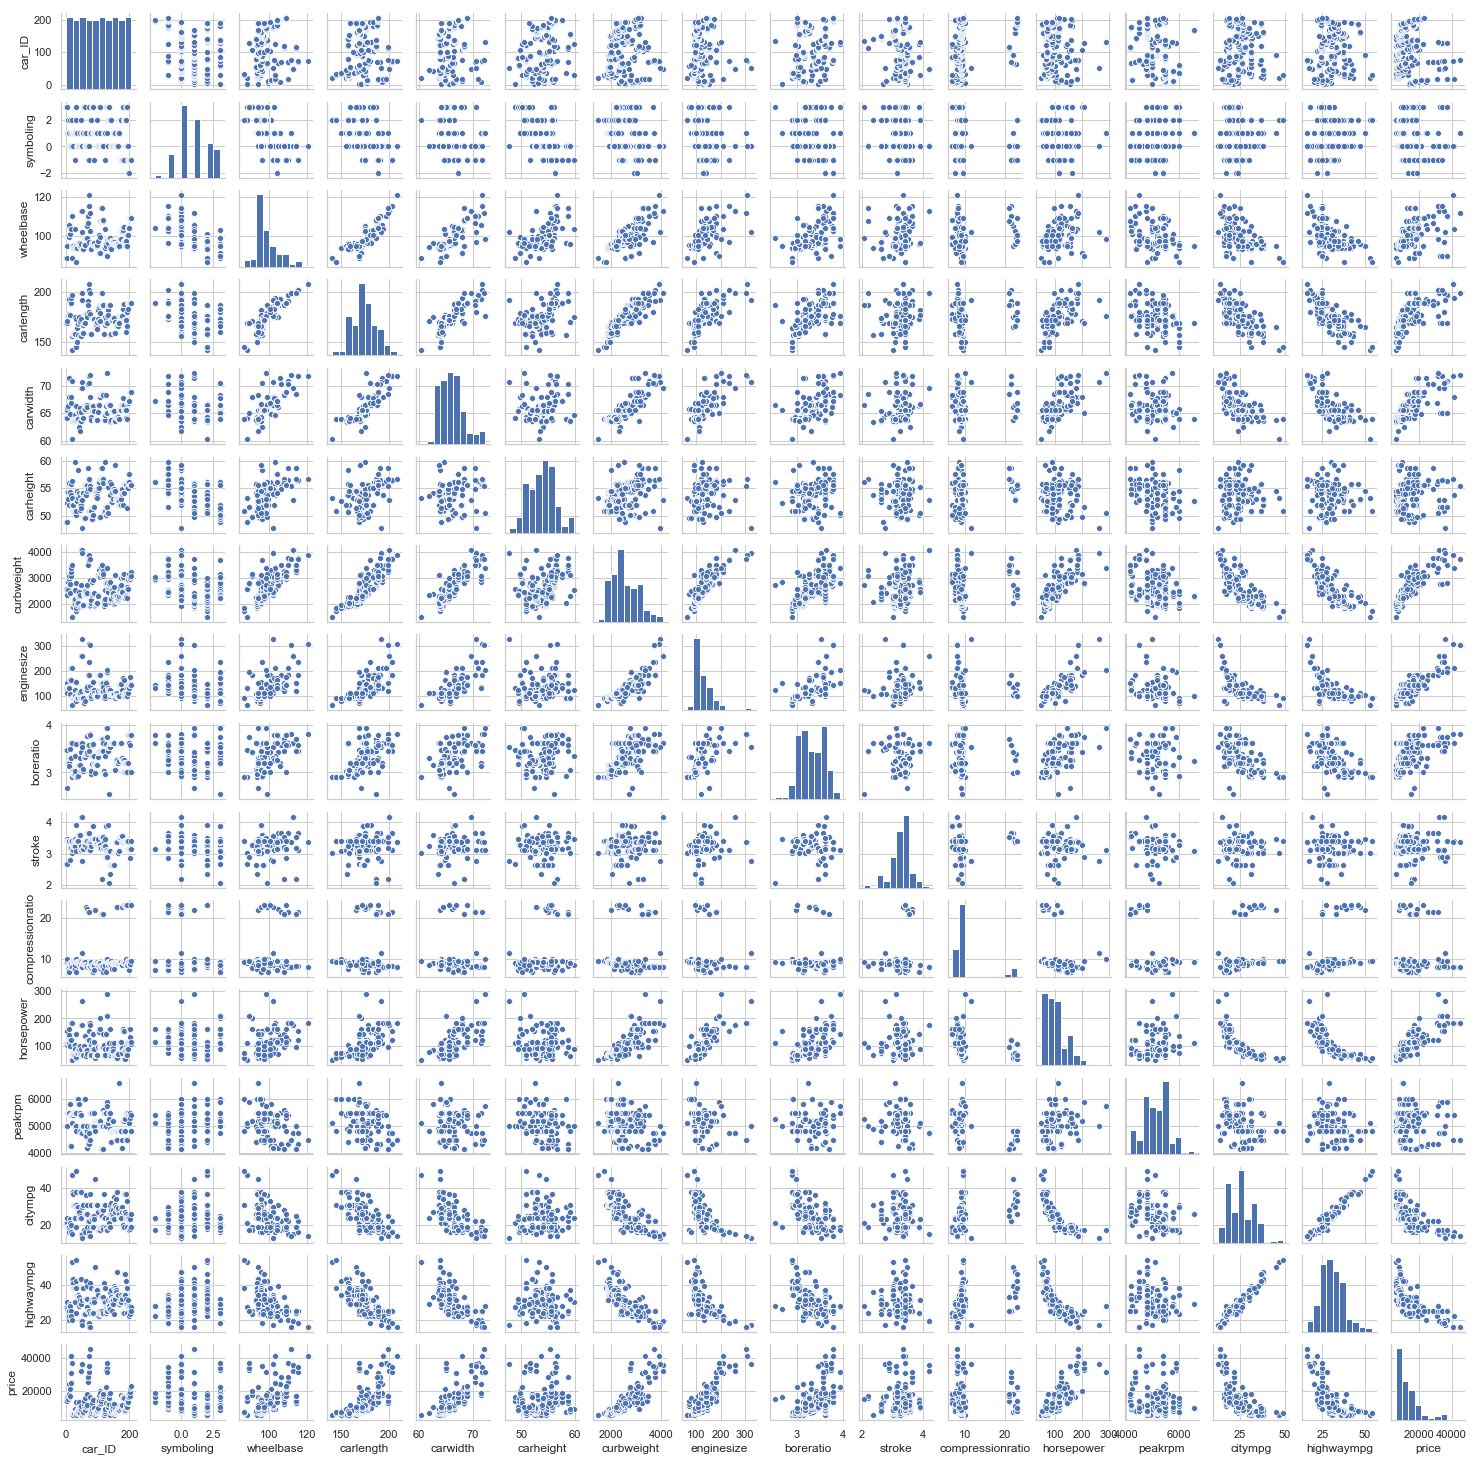

In [12]:
pairplot = sns.pairplot(cars_df)
pairplot.fig.set_size_inches(20,20)
plt.show()

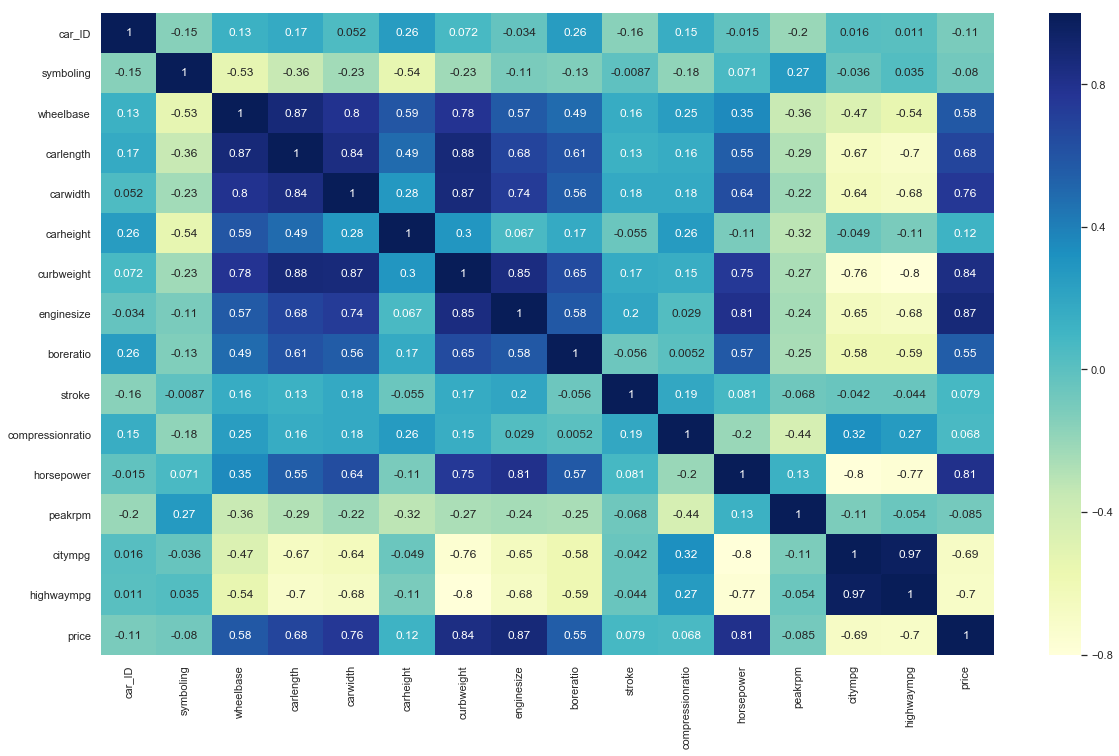

In [13]:
plt.figure(figsize = (20, 26))
plt.subplot(2, 1, 1)
sns.heatmap(cars_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

Categorical Data

CompanyName
jaguar       35550.0000
buick        32892.0000
porsche      32528.0000
bmw          22835.0000
volvo        18420.0000
audi         17710.0000
peugeot      16630.0000
mercury      16503.0000
alfa-romeo   16500.0000
saab         15275.0000
mazda        10595.0000
volkswagen    9737.5000
renault       9595.0000
toyota        9103.0000
isuzu         8916.5000
mitsubishi    8499.0000
nissan        8124.0000
subaru        7894.0000
plymouth      7609.0000
dodge         7609.0000
honda         7295.0000
chevrolet     6295.0000
Name: price, dtype: float64
----------------------------------------------------------------------------------------------------------------


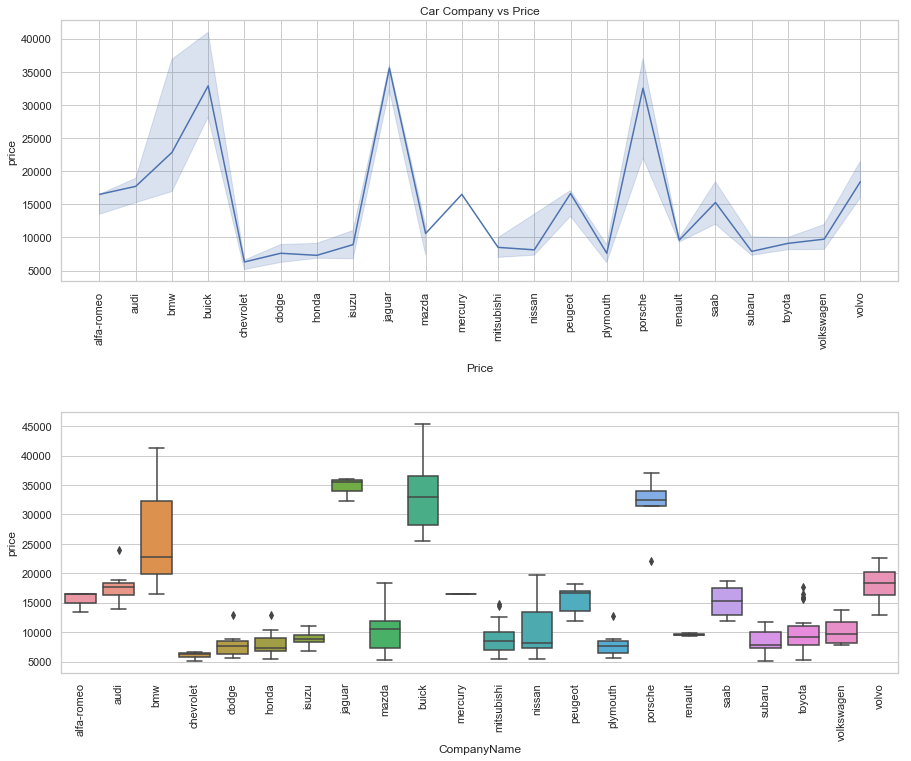

In [14]:
print(cars_df.groupby(by='CompanyName').price.median().sort_values(ascending=False))
print('----------------------------------------------------------------------------------------------------------------')

plt.figure(figsize=(15, 12))

plt.subplot(2, 1, 1)
sns.lineplot(x='CompanyName', y='price', data=cars_df, estimator=np.median)
plt.xticks(rotation=90)
plt.title('Car Company vs Price')
plt.xlabel('Car Company', labelpad = 15)
plt.xlabel('Price', labelpad = 15)

plt.subplot(2, 1, 2)
sns.boxplot(x='CompanyName', y='price', data=cars_df)
plt.xticks(rotation=90)

plt.subplots_adjust(hspace=0.5)
plt.show()

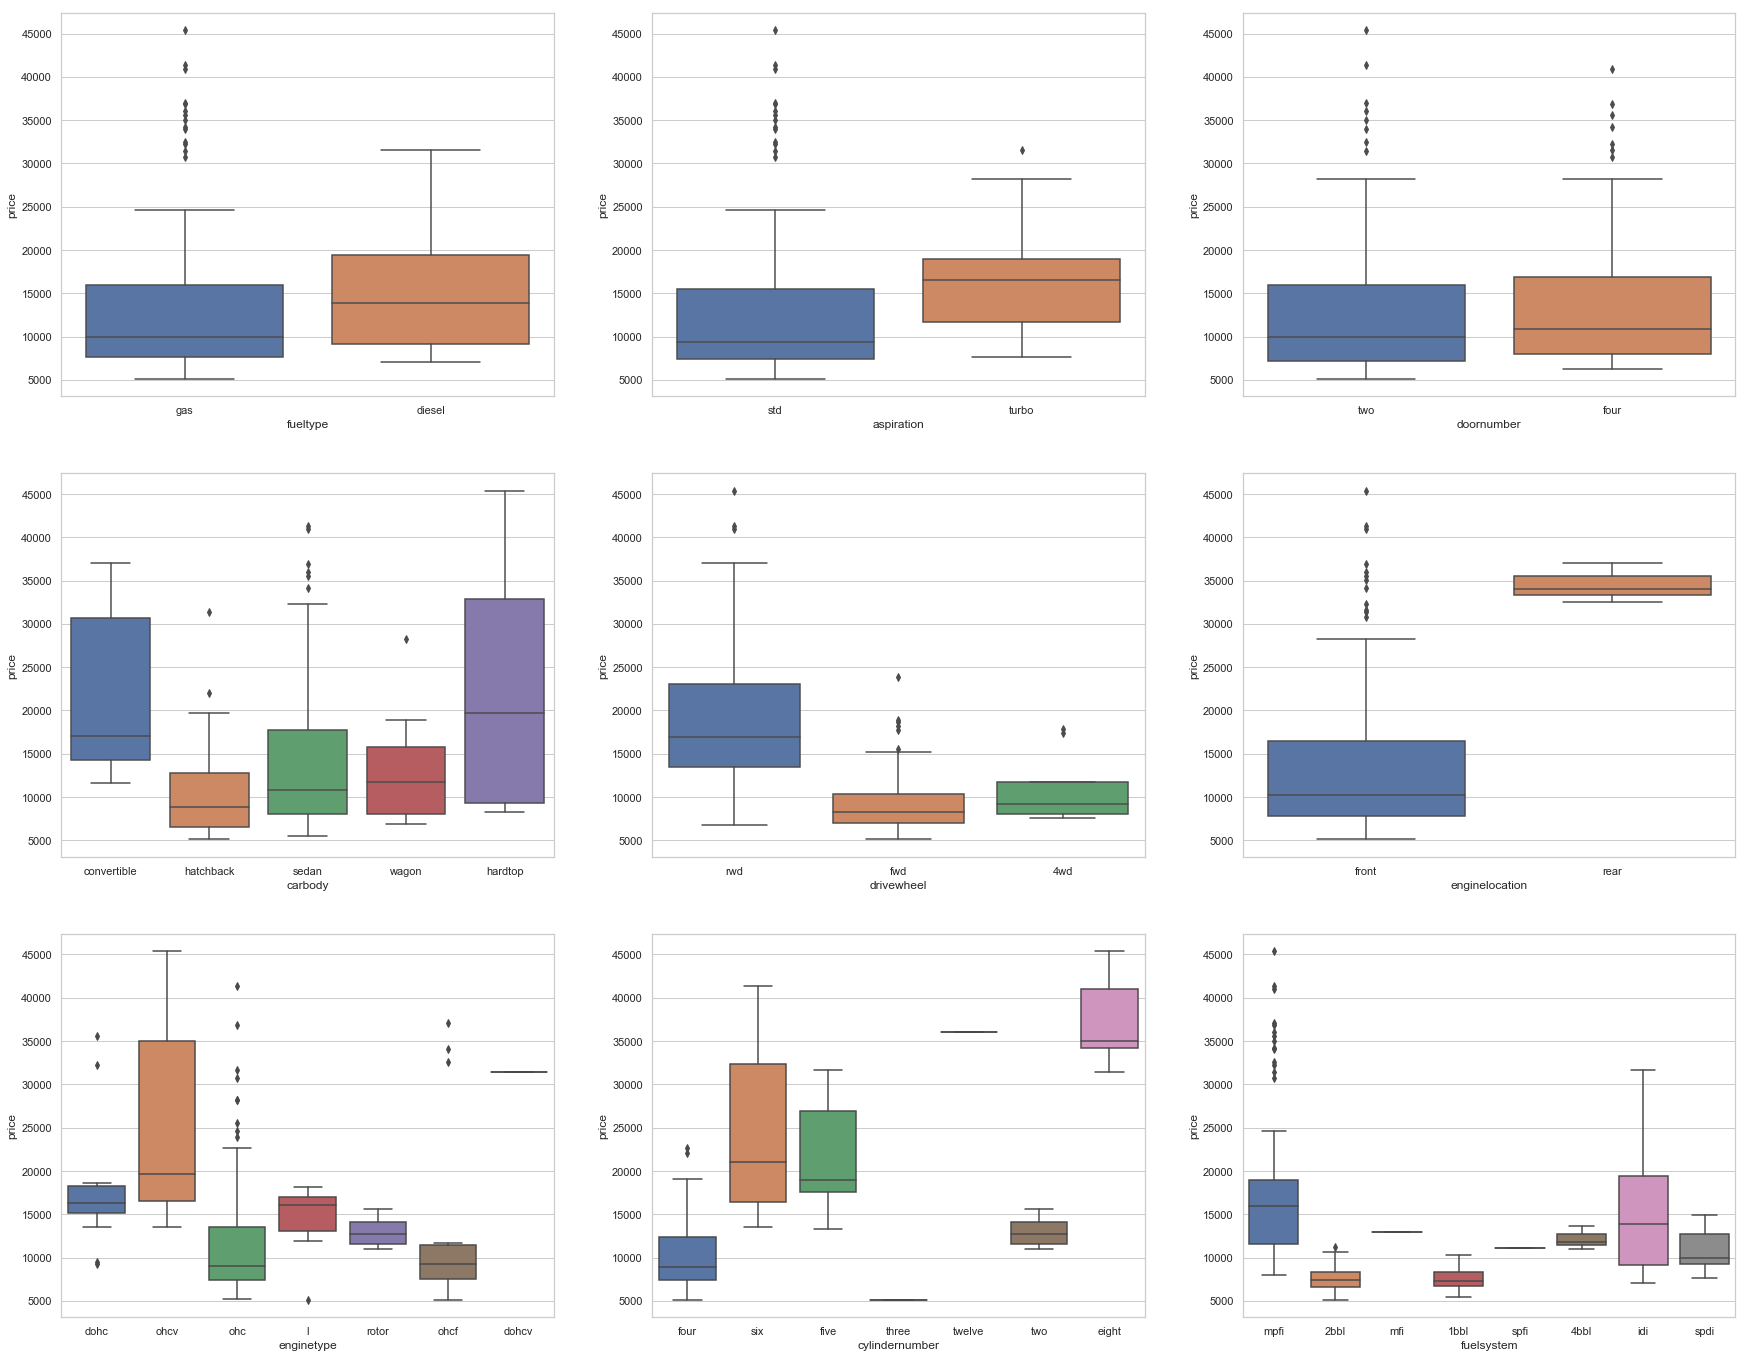

In [15]:
plt.figure(figsize=(30, 24))

plt.subplot(3,3,1)
sns.boxplot(x='fueltype', y = 'price', data = cars_df)

plt.subplot(3, 3, 2)
sns.boxplot(x='aspiration', y = 'price', data = cars_df)

plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = cars_df)

plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = cars_df)

plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars_df)

plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars_df)

plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = cars_df)

plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars_df)

plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars_df)

plt.show()


Data Predection

In [16]:
print("Unique values in fueltype")
print(cars_df['fueltype'].unique())

print('\n')


print("Unique values in aspiration")
print(cars_df['aspiration'].unique())

print('\n')


print("Unique values in doornumber")
print(cars_df['doornumber'].unique())

print('\n')


print("Unique values in carbody")
print(cars_df['carbody'].unique())

print('\n')


print("Unique values in drivewheel")
print(cars_df['drivewheel'].unique())

print('\n')


print("Unique values in enginelocation")
print(cars_df['enginelocation'].unique())

print('\n')


print("Unique values in enginetype")
print(cars_df['enginetype'].unique())

print('\n')


print("Unique values in cylindernumber")
print(cars_df['cylindernumber'].unique())

print('\n')


print("Unique values in fuelsystem")
print(cars_df['fuelsystem'].unique())

Unique values in fueltype
['gas' 'diesel']


Unique values in aspiration
['std' 'turbo']


Unique values in doornumber
['two' 'four']


Unique values in carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


Unique values in drivewheel
['rwd' 'fwd' '4wd']


Unique values in enginelocation
['front' 'rear']


Unique values in enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


Unique values in cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


Unique values in fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [17]:
cars_df['fueltype'] = cars_df['fueltype'].map({'diesel':0, 'gas':1})
cars_df['aspiration'] = cars_df['aspiration'].map({'turbo':0, 'std':1})
cars_df['doornumber'] = cars_df['doornumber'].map({'two':0, 'four':1})
cars_df['enginelocation'] = cars_df['enginelocation'].map({'rear':0, 'front':1})



cars_df = pd.get_dummies(cars_df, columns=['drivewheel','carbody', 'enginetype', 'cylindernumber', 'fuelsystem'])
cars_df.head()

,CompanyName,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,alfa-romeo,1,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,alfa-romeo,2,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,alfa-romeo,3,1,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,audi,4,2,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,audi,5,2,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [18]:
cars_df.drop(labels = ['carbody_hatchback'], axis = 1, inplace = True)


cars_df.drop(labels = ['fuelsystem_1bbl'], axis = 1, inplace = True)


cars_df.drop(labels = ['drivewheel_4wd'], axis = 1, inplace = True)


cars_df.drop(labels = ['enginetype_rotor'], axis = 1, inplace = True)


cars_df.drop(labels = ['cylindernumber_three'], axis = 1, inplace = True)


print(cars_df.columns)
print(cars_df.shape)

Index(['CompanyName', 'car_ID', 'symboling', 'fueltype', 'aspiration',
       'doornumber', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'drivewheel_fwd', 'drivewheel_rwd', 'carbody_convertible',
       'carbody_hardtop', 'carbody_sedan', 'carbody_wagon', 'enginetype_dohc',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi'],
      dtype='object')
(205, 46)


In [19]:
cars_df['CompanyName'].unique()

array(['alfa-romeo', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [20]:
cars_df.price.describe([.40, .80])

count     205.0000
mean    13276.7106
std      7988.8523
min      5118.0000
40%      9036.6000
50%     10295.0000
80%     17493.8000
max     45400.0000
Name: price, dtype: float64

In [21]:
cars_df_category = cars_df.groupby(['CompanyName']).median()
cars_df_category['price']

CompanyName
alfa-romeo   16500.0000
audi         17710.0000
bmw          22835.0000
buick        32892.0000
chevrolet     6295.0000
dodge         7609.0000
honda         7295.0000
isuzu         8916.5000
jaguar       35550.0000
mazda        10595.0000
mercury      16503.0000
mitsubishi    8499.0000
nissan        8124.0000
peugeot      16630.0000
plymouth      7609.0000
porsche      32528.0000
renault       9595.0000
saab         15275.0000
subaru        7894.0000
toyota        9103.0000
volkswagen    9737.5000
volvo        18420.0000
Name: price, dtype: float64

In [22]:
CarLabels = ['EconomicCars', 'MidTierCars', 'LuxuryCars']
bins = [0, 10000, 20000, 50000]

cars_df_category = cars_df_category[['price']].join(pd.get_dummies(pd.cut(cars_df_category.price, bins, labels=CarLabels)))
cars_df_category

,price,EconomicCars,MidTierCars,LuxuryCars
CompanyName,,,,
alfa-romeo,16500.0000,0,1,0
audi,17710.0000,0,1,0
bmw,22835.0000,0,0,1
buick,32892.0000,0,0,1
chevrolet,6295.0000,1,0,0
dodge,7609.0000,1,0,0
honda,7295.0000,1,0,0
isuzu,8916.5000,1,0,0
jaguar,35550.0000,0,0,1


In [23]:
luxuryCars = ['bmw', 'buick', 'jaguar', 'porsche']


def mapCarCompanyToLuxuryCategory(carCompanies):
    val = 0
    if carCompanies in luxuryCars:
        val = 1
    else:
        val = 0
        
    return int(val)


cars_df['LuxuryCars'] = 0
cars_df['LuxuryCars'] = cars_df['CompanyName'].apply(mapCarCompanyToLuxuryCategory)

In [24]:
midTierCars = ['alfa-romeo', 'audi', 'mazda', 'mercury', 'peugeot', 'saab', 'volvo']
def mapCarCompanyToMidTierCategory(carCompanies1):
    retval = 0
    if carCompanies1 in midTierCars:
        retval = 1
    else:
        retval = 0
    return int(retval)

cars_df['MidTierCars'] = 0
cars_df['MidTierCars'] = cars_df['CompanyName'].apply(mapCarCompanyToMidTierCategory) 

# Lets look at the dataframe again
cars_df.head()

,CompanyName,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars
0,alfa-romeo,1,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,alfa-romeo,2,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,alfa-romeo,3,1,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,audi,4,2,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,audi,5,2,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [25]:
cars_df.drop(labels=['CompanyName'], axis = 1, inplace=True)
cars_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars
0,1,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
1,2,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,3,1,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,4,2,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,5,2,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [26]:
SymbolingLabels = ['LowRisk', 'ModerateRisk', 'HighRisk']
bins = [-3, -2, 2, 3]

cars_df = cars_df.join(pd.get_dummies(pd.cut(cars_df['symboling'], bins, labels=SymbolingLabels)))
cars_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk,HighRisk
0,1,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
1,2,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
2,3,1,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
3,4,2,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,5,2,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0


In [27]:
cars_df.drop(labels=['HighRisk'], axis = 1, inplace = True)
cars_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk
0,1,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2,3,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,3,1,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,4,2,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,5,2,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [28]:
cars_df.drop(labels=['symboling'], axis = 1, inplace = True)
cars_df.head()

,car_ID,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk
0,1,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2,1,1,0,1,88.6000,168.8000,64.1000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,3,1,1,0,1,94.5000,171.2000,65.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,4,1,1,1,1,99.8000,176.6000,66.2000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,5,1,1,1,1,99.4000,176.6000,66.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


Numerical data

In [29]:
cars_df.drop(labels=['carwidth', 'carlength', 'highwaympg', 'citympg'], axis = 1, inplace=True)

# lets have a look at the final data before proceeding with the model building.
cars_df.head()

,car_ID,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,LuxuryCars,MidTierCars,LowRisk,ModerateRisk
0,1,1,1,0,1,88.6000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,13495.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,2,1,1,0,1,88.6000,48.8000,2548,130,3.4700,2.6800,9.0000,111,5000,16500.0000,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,3,1,1,0,1,94.5000,52.4000,2823,152,2.6800,3.4700,9.0000,154,5000,16500.0000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,4,1,1,1,1,99.8000,54.3000,2337,109,3.1900,3.4000,10.0000,102,5500,13950.0000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1
4,5,1,1,1,1,99.4000,54.3000,2824,136,3.1900,3.4000,8.0000,115,5500,17450.0000,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1


In [30]:
def applyStatsModel(data):
     
    X_train_linear_model = sm.add_constant(data)
    
    
    linear_model = sm.OLS(y_train, X_train_linear_model).fit() 
    
    return linear_model

In [31]:
def calculateVIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    
    
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

Train and test sets

In [32]:
np.random.seed(0)


df_train, df_test = train_test_split(cars_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [33]:
scaler = MinMaxScaler()

num_vars = ['carheight', 'enginesize','wheelbase', 'curbweight', 'horsepower', 'boreratio' ,'stroke',
            'compressionratio', 'peakrpm', 'price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
y_train = df_train.pop('price')
X_train = df_train

In [35]:
lm = LinearRegression()
lm.fit(X_train, y_train)


rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 26),
 ('fueltype', False, 9),
 ('aspiration', False, 11),
 ('doornumber', False, 25),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carheight', False, 14),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', False, 5),
 ('drivewheel_fwd', False, 19),
 ('drivewheel_rwd', False, 18),
 ('carbody_convertible', True, 1),
 ('carbody_hardtop', False, 16),
 ('carbody_sedan', False, 20),
 ('carbody_wagon', False, 24),
 ('enginetype_dohc', False, 21),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', False, 3),
 ('enginetype_ohcf', False, 6),
 ('enginetype_ohcv', False, 12),
 ('cylindernumber_eight', True, 1),
 ('cylindernumber_five', False, 2),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 22),
 ('fuelsystem_2bbl', False, 27),


In [37]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'carbody_convertible',
       'enginetype_dohcv', 'cylindernumber_eight', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve', 'LuxuryCars'],
      dtype='object')

In [38]:
X_train.columns[~rfe.support_]

Index(['car_ID', 'fueltype', 'aspiration', 'doornumber', 'carheight',
       'peakrpm', 'drivewheel_fwd', 'drivewheel_rwd', 'carbody_hardtop',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohc', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'cylindernumber_five', 'cylindernumber_two', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'MidTierCars',
       'LowRisk', 'ModerateRisk'],
      dtype='object')

Statmodles

In [39]:
X_train_1 = X_train[col]


stats_model_1 = applyStatsModel(X_train_1)


print(stats_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     118.3
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           5.95e-67
Time:                        20:26:44   Log-Likelihood:                 210.47
No. Observations:                 143   AIC:                            -388.9
Df Residuals:                     127   BIC:                            -341.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [40]:
vif_val_1 = calculateVIF(X_train_1)


vif_val_1

,Features,VIF
2,curbweight,70.7500
3,enginesize,66.6300
0,enginelocation,41.8200
5,stroke,30.2000
7,horsepower,26.7700
1,wheelbase,25.9800
4,boreratio,25.9200
11,cylindernumber_four,11.3800
12,cylindernumber_six,5.9700
13,cylindernumber_twelve,4.2400


In [41]:
X_train_2 = X_train_1.drop(["cylindernumber_eight"], axis = 1)


stats_model_2 = applyStatsModel(X_train_2)


print(stats_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     127.6
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           5.73e-68
Time:                        20:27:24   Log-Likelihood:                 210.35
No. Observations:                 143   AIC:                            -390.7
Df Residuals:                     128   BIC:                            -346.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [42]:
vif_val_2 = calculateVIF(X_train_2)

# Let's see the vif values
vif_val_2

,Features,VIF
2,curbweight,70.3000
3,enginesize,44.7300
0,enginelocation,35.1200
7,horsepower,26.7500
1,wheelbase,25.9000
5,stroke,23.9300
4,boreratio,20.8800
10,cylindernumber_four,11.1100
11,cylindernumber_six,3.8300
12,cylindernumber_twelve,2.9400


In [43]:
X_train_3 = X_train_2.drop(["enginesize"], axis = 1)

# Run the linear model
stats_model_3 = applyStatsModel(X_train_3)

#Let's see the summary of the new linear model
print(stats_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     137.5
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           7.23e-69
Time:                        20:28:18   Log-Likelihood:                 209.88
No. Observations:                 143   AIC:                            -391.8
Df Residuals:                     129   BIC:                            -350.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [44]:
vif_val_3 = calculateVIF(X_train_3)

# Let's see the vif values
vif_val_3

,Features,VIF
2,curbweight,60.3700
0,enginelocation,31.3100
6,horsepower,26.6900
1,wheelbase,25.8100
3,boreratio,19.0600
4,stroke,18.9900
9,cylindernumber_four,11.0100
5,compressionratio,2.8000
10,cylindernumber_six,2.7100
12,LuxuryCars,2.0000


In [45]:
X_train_4 = X_train_3.drop(["stroke"], axis = 1)

# Run the linear model
stats_model_4 = applyStatsModel(X_train_4)

#Let's see the summary of the new linear model
print(stats_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     149.6
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           6.93e-70
Time:                        20:28:54   Log-Likelihood:                 209.68
No. Observations:                 143   AIC:                            -393.4
Df Residuals:                     130   BIC:                            -354.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [46]:
vif_val_4 = calculateVIF(X_train_4)

# Let's see the vif values
vif_val_4

,Features,VIF
2,curbweight,59.7100
1,wheelbase,25.7700
5,horsepower,24.1100
0,enginelocation,20.2900
3,boreratio,15.4000
8,cylindernumber_four,10.5300
9,cylindernumber_six,2.6700
4,compressionratio,2.5400
11,LuxuryCars,1.9700
7,enginetype_dohcv,1.7500


In [47]:
X_train_5 = X_train_4.drop(["boreratio"], axis = 1)


stats_model_5 = applyStatsModel(X_train_5)


print(stats_model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     163.9
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           6.59e-71
Time:                        20:29:29   Log-Likelihood:                 209.43
No. Observations:                 143   AIC:                            -394.9
Df Residuals:                     131   BIC:                            -359.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [48]:
vif_val_5 = calculateVIF(X_train_5)


vif_val_5

,Features,VIF
2,curbweight,56.6500
1,wheelbase,25.7600
4,horsepower,22.3400
0,enginelocation,20.1700
7,cylindernumber_four,8.5200
8,cylindernumber_six,2.6100
3,compressionratio,2.5300
10,LuxuryCars,1.9300
6,enginetype_dohcv,1.7500
9,cylindernumber_twelve,1.4300


In [49]:
X_train_6 = X_train_5.drop(["cylindernumber_twelve"], axis = 1)


stats_model_6 = applyStatsModel(X_train_6)


print(stats_model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     179.8
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           8.85e-72
Time:                        20:30:05   Log-Likelihood:                 208.76
No. Observations:                 143   AIC:                            -395.5
Df Residuals:                     132   BIC:                            -362.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1657    

In [50]:
vif_val_6 = calculateVIF(X_train_6)


vif_val_6

,Features,VIF
2,curbweight,56.2500
1,wheelbase,25.6100
0,enginelocation,20.1300
4,horsepower,19.3400
7,cylindernumber_four,8.4900
3,compressionratio,2.4400
8,cylindernumber_six,2.2700
9,LuxuryCars,1.8900
6,enginetype_dohcv,1.5500
5,carbody_convertible,1.3500


In [51]:
X_train_7 = X_train_6.drop(["cylindernumber_six"], axis = 1)


stats_model_7 = applyStatsModel(X_train_7)


print(stats_model_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     198.5
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           1.47e-72
Time:                        20:30:39   Log-Likelihood:                 207.80
No. Observations:                 143   AIC:                            -395.6
Df Residuals:                     133   BIC:                            -366.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1480    

In [53]:
 
vif_val_7 = calculateVIF(X_train_7)


vif_val_7

,Features,VIF
2,curbweight,56.0000
1,wheelbase,25.5800
0,enginelocation,19.0800
4,horsepower,18.1100
7,cylindernumber_four,6.9700
3,compressionratio,2.4400
8,LuxuryCars,1.8900
6,enginetype_dohcv,1.4100
5,carbody_convertible,1.3400


In [54]:
X_train_8 = X_train_7.drop(["enginetype_dohcv"], axis = 1)


stats_model_8 = applyStatsModel(X_train_8)


print(stats_model_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     218.3
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           6.04e-73
Time:                        20:31:51   Log-Likelihood:                 205.82
No. Observations:                 143   AIC:                            -393.6
Df Residuals:                     134   BIC:                            -367.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1864    

In [55]:
# Calculate the VIFs again for the new model


# Let's see the vif values


,Features,VIF
2,curbweight,50.8800
1,wheelbase,25.2900
0,enginelocation,18.8600
4,horsepower,14.1100
6,cylindernumber_four,6.9100
3,compressionratio,2.3100
7,LuxuryCars,1.8700
5,carbody_convertible,1.3400


In [56]:
X_train_9 = X_train_8.drop(["compressionratio"], axis = 1)


stats_model_9 = applyStatsModel(X_train_9)


print(stats_model_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     244.1
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           2.29e-73
Time:                        20:32:28   Log-Likelihood:                 203.87
No. Observations:                 143   AIC:                            -391.7
Df Residuals:                     135   BIC:                            -368.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2084    

In [57]:
vif_val_9 = calculateVIF(X_train_9)


vif_val_9

,Features,VIF
2,curbweight,46.0000
1,wheelbase,25.2400
0,enginelocation,18.6700
3,horsepower,11.6000
5,cylindernumber_four,6.9100
6,LuxuryCars,1.8600
4,carbody_convertible,1.3300


In [58]:
X_train_10 = X_train_9.drop(["curbweight"], axis = 1)


X_train_linear_model = sm.add_constant(X_train_10)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 


print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     262.3
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           3.56e-72
Time:                        20:33:09   Log-Likelihood:                 197.95
No. Observations:                 143   AIC:                            -381.9
Df Residuals:                     136   BIC:                            -361.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2095    

In [59]:
X_train_10.columns

Index(['enginelocation', 'wheelbase', 'horsepower', 'carbody_convertible',
       'cylindernumber_four', 'LuxuryCars'],
      dtype='object')

In [60]:
vif_val_10 = calculateVIF(X_train_10)


vif_val_10

,Features,VIF
0,enginelocation,18.6100
1,wheelbase,7.1300
4,cylindernumber_four,6.8600
2,horsepower,5.3500
5,LuxuryCars,1.8400
3,carbody_convertible,1.1100


In [61]:
X_train_11 = X_train_10.drop(["enginelocation"], axis = 1)


X_train_linear_model = sm.add_constant(X_train_11)
linear_model = sm.OLS(y_train, X_train_linear_model).fit() 


print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     289.6
Date:                Fri, 24 Apr 2020   Prob (F-statistic):           5.62e-71
Time:                        20:34:15   Log-Likelihood:                 192.00
No. Observations:                 143   AIC:                            -372.0
Df Residuals:                     137   BIC:                            -354.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0163    

In [62]:
vif_val_11 = calculateVIF(X_train_11)


vif_val_11

,Features,VIF
0,wheelbase,5.0300
1,horsepower,3.8400
3,cylindernumber_four,2.4100
4,LuxuryCars,1.8300
2,carbody_convertible,1.0900


Residual Analysis of the train data

In [78]:
X_train_linear_model.columns

Index(['const', 'wheelbase', 'horsepower', 'carbody_convertible',
       'cylindernumber_four', 'LuxuryCars'],
      dtype='object')

In [79]:
y_train_price = linear_model.predict(X_train_linear_model)

Text(0.5, 0, 'Errors')

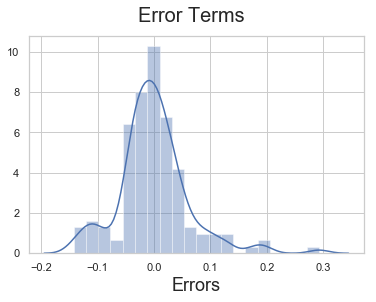

In [80]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

conclusion

From the final model we have all our variables in the permissible limits and the model looks to be stable. The error terms are also normally distributed. Overall the model looks good.

Our deciding factors would be -

1. wheelbase    
2. horsepower    
3. cylindernumber_four
4. LuxuryCars
5. carbody_convertible